## Exploración datos Capstone + cuánta segmentación usar
Avance 23 y 24 de agosto

In [22]:
pip install pandas matplotlib seaborn pyarrow

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

manhattan_ids = [12, 13, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79,
                 87, 88, 90, 100, 103, 104, 105, 106, 107, 113, 114,
                 116, 120, 125, 127, 128, 137, 140, 141, 142, 143,
                 144, 148, 151, 152, 153, 158, 161, 162, 163, 164,
                 166, 170, 186, 202, 209, 211, 224, 229, 230, 231,
                 232, 233, 234, 236, 237, 239, 243, 244, 246, 249,
                 261, 262, 263, 264, 265]

#print(df.head())

In [24]:
df = pd.read_parquet("Datos/fhv_tripdata_2025-01.parquet")
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2025-01-01 00:20:00,2025-01-01 00:57:00,NaN,NaN,NaN,B00009
1,B00013,2025-01-01 00:40:00,2025-01-01 02:21:00,NaN,NaN,NaN,B00888
2,B00112,2025-01-01 00:22:59,2025-01-01 00:45:28,NaN,108.0,NaN,B00112
3,B00112,2025-01-01 00:32:57,2025-01-01 00:33:10,NaN,14.0,NaN,B00112
4,B00112,2025-01-01 00:46:48,2025-01-01 00:49:51,NaN,14.0,NaN,B00112


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898108 entries, 0 to 1898107
Data columns (total 7 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   dispatching_base_num    object        
 1   pickup_datetime         datetime64[us]
 2   dropOff_datetime        datetime64[us]
 3   PUlocationID            float64       
 4   DOlocationID            float64       
 5   SR_Flag                 float64       
 6   Affiliated_base_number  object        
dtypes: datetime64[us](2), float64(3), object(2)
memory usage: 101.4+ MB


----------------------------------------------
----------------------------------------------

#### ¿Cuánta segmentación usar (día, hora, semana, mes ...) sin quedarnos sin datos ni sobre complicar? ¿Qué factores explican la variación de demanda? 

#### ¿Basta con OD x hora x día? ¿O necesito tmb distinguir por semanas o meses?

In [26]:
import glob

# Cargar y unir los 5 archivos de meses
archivos = sorted(glob.glob("Datos/fhv_tripdata_2025-0[1-5].parquet"))
dfs = []
for archivo in archivos:
    df_temp = pd.read_parquet(archivo)
    df_temp = df_temp[
        (df_temp["PUlocationID"].isin(manhattan_ids)) & 
        (df_temp["DOlocationID"].isin(manhattan_ids))
    ].copy()
    df_temp['pickup_datetime'] = pd.to_datetime(df_temp['pickup_datetime'])
    df_temp['month'] = df_temp['pickup_datetime'].dt.month
    df_temp['weekday'] = df_temp['pickup_datetime'].dt.day_name()
    dfs.append(df_temp)

df_all = pd.concat(dfs, ignore_index=True)

In [27]:
print(df_all.shape[0])

224835


In [28]:
df_all.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,month,weekday
0,B00254,2025-01-01 00:17:33,2025-01-01 00:41:16,161.0,265.0,NaN,B00254,1,Wednesday
1,B00254,2025-01-01 00:22:04,2025-01-01 00:26:42,163.0,237.0,NaN,B00254,1,Wednesday
2,B00254,2025-01-01 00:27:03,2025-01-01 00:31:42,237.0,141.0,NaN,B00254,1,Wednesday
3,B01087,2025-01-01 00:42:15,2025-01-01 01:20:48,170.0,265.0,NaN,B01087,1,Wednesday
4,B01087,2025-01-01 00:48:00,2025-01-01 01:25:45,142.0,265.0,NaN,B01087,1,Wednesday


In [29]:
# Agrupar por mes y día de la semana
demanda = df_all.groupby(['month', 'weekday']).size().reset_index(name='count')

In [30]:
demanda.head(50)

,month,weekday,count
0,1,Friday,9931
1,1,Monday,6025
2,1,Saturday,7716
3,1,Sunday,5593
4,1,Thursday,9794
5,1,Tuesday,8056
6,1,Wednesday,9098
7,2,Friday,7602
8,2,Monday,5591
9,2,Saturday,7138


In [45]:
df_all['pickup_datetime'].dt.date.value_counts().sort_index()

pickup_datetime
2025-01-01     790
2025-01-02    1455
2025-01-03    1757
2025-01-04    1722
2025-01-05    1399
              ... 
2025-05-27    1778
2025-05-28    2306
2025-05-29    2231
2025-05-30    2009
2025-05-31    1572
Name: count, Length: 151, dtype: int64

In [31]:
viajes_por_mes_2025 = df_all['month'].value_counts().sort_index()
print(viajes_por_mes_2025)

month
1    56213
2    48256
3    20160
4    45851
5    54355
Name: count, dtype: int64


Marzo tiene menos de la mitad de viajes. ¿Por qué?

------------------------------------
------------------------------------

¿Pasó lo mismo en el 2024?

In [32]:
ruta = "/Users/jmatas/OneDrive/Universidad/8vo semestre/Capstone/Datos 2024"
archivos_2024 = sorted(glob.glob(f"{ruta}/fhv_tripdata_2024-*.parquet"))
dfs = []
for archivo in archivos_2024:
    df_temp = pd.read_parquet(archivo)
    df_temp = df_temp[
        (df_temp["PUlocationID"].isin(manhattan_ids)) & 
        (df_temp["DOlocationID"].isin(manhattan_ids))
    ].copy()
    df_temp['pickup_datetime'] = pd.to_datetime(df_temp['pickup_datetime'])
    df_temp['month'] = df_temp['pickup_datetime'].dt.month
    df_temp['weekday'] = df_temp['pickup_datetime'].dt.day_name()
    dfs.append(df_temp)

df_all_2024 = pd.concat(dfs, ignore_index=True)
demanda_2024 = df_all_2024.groupby(['month', 'weekday']).size().reset_index(name='count')
viajes_por_mes_2024 = df_all_2024['month'].value_counts().sort_index()
print(viajes_por_mes_2024)


month
1     17447
2     13663
3     16367
4     66763
5     15095
6     54461
7     58138
8     13923
9     56917
10    53276
11    60239
12    14855
Name: count, dtype: int64


In [33]:
ruta = "/Users/jmatas/OneDrive/Universidad/8vo semestre/Capstone/Datos 2023"
archivos_2023 = sorted(glob.glob(f"{ruta}/fhv_tripdata_2023-*.parquet"))
dfs = []
for archivo in archivos_2023:
    df_temp = pd.read_parquet(archivo)
    df_temp = df_temp[
        (df_temp["PUlocationID"].isin(manhattan_ids)) & 
        (df_temp["DOlocationID"].isin(manhattan_ids))
    ].copy()
    df_temp['pickup_datetime'] = pd.to_datetime(df_temp['pickup_datetime'])
    df_temp['month'] = df_temp['pickup_datetime'].dt.month
    df_temp['weekday'] = df_temp['pickup_datetime'].dt.day_name()
    dfs.append(df_temp)

df_all_2023 = pd.concat(dfs, ignore_index=True)
demanda_2023 = df_all_2023.groupby(['month', 'weekday']).size().reset_index(name='count')
viajes_por_mes_2023 = df_all_2023['month'].value_counts().sort_index()
print(viajes_por_mes_2023)

month
1     42309
2     48027
3     56360
4     52986
5     54464
6     56543
7     69512
8     74375
9     82357
10    83648
11    12947
12    17350
Name: count, dtype: int64


In [34]:
# Total de viajes en 2025, 2024 y lo que va del 2023
print(df_all.shape[0])
print(df_all_2024.shape[0])
print(df_all_2023.shape[0]) 

224835
441144
650878


In [46]:
import pandas as pd

# Combinar en un solo DataFrame
df_meses = pd.DataFrame({
    "2023": viajes_por_mes_2023,
    "2024": viajes_por_mes_2024,
    "2025": viajes_por_mes_2025
}).sort_index()

print(df_meses.head(12))

        2023   2024     2025
month                       
1      42309  17447  56213.0
2      48027  13663  48256.0
3      56360  16367  20160.0
4      52986  66763  45851.0
5      54464  15095  54355.0
6      56543  54461      NaN
7      69512  58138      NaN
8      74375  13923      NaN
9      82357  56917      NaN
10     83648  53276      NaN
11     12947  60239      NaN
12     17350  14855      NaN


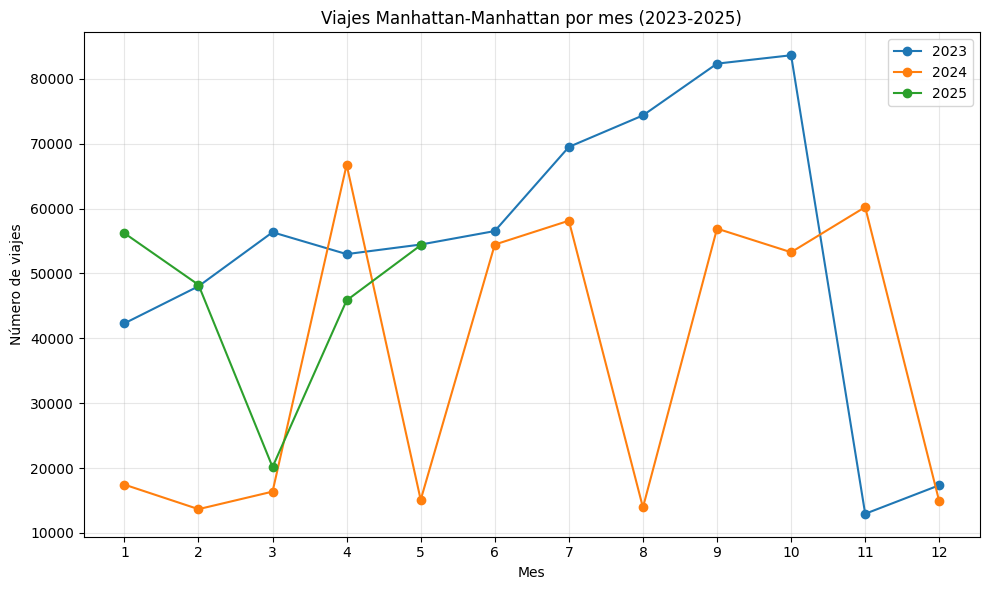

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for year in df_meses.columns:
    plt.plot(df_meses.index, df_meses[year], marker="o", label=year)

plt.title("Viajes Manhattan-Manhattan por mes (2023-2025)")
plt.xlabel("Mes")
plt.ylabel("Número de viajes")
plt.xticks(range(1,13))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

-----------------------------------------------------
-----------------------------------------------------

In [38]:
# Crear columna de semana del mes
df_all['week_of_month'] = df_all['pickup_datetime'].dt.day.apply(lambda d: (d - 1) // 7 + 1)
# Crear columna de hora
df_all['hour'] = df_all['pickup_datetime'].dt.hour

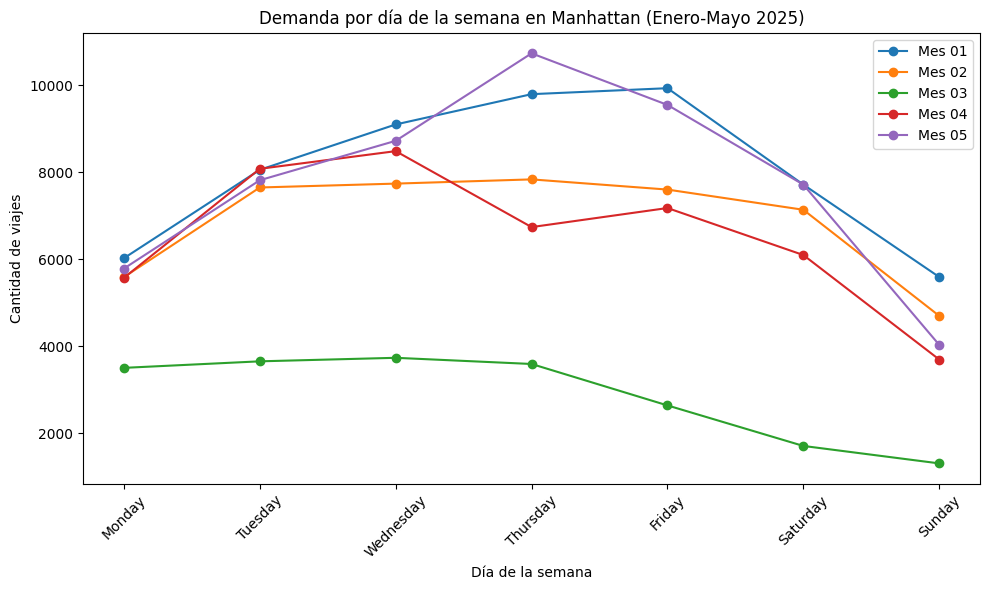

In [39]:
# Ordenar los días de la semana
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Graficar
plt.figure(figsize=(10,6))
for mes in sorted(demanda['month'].unique()):
    datos_mes = demanda[demanda['month'] == mes]
    datos_mes = datos_mes.set_index('weekday').reindex(dias_orden)
    plt.plot(dias_orden, datos_mes['count'], marker='o', label=f'Mes {mes:02d}')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de viajes')
plt.title('Demanda por día de la semana en Manhattan (Enero-Mayo 2025)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# El comportamiento según los días de la semana es parecido para los 5 meses del 2025. El jueves del mes 4 baja -> ¿A qué se debe eso?
# Veamos la dda de todos los jueves del mes 4 para ver si hay algún día que parece ser especialmente baja
df_jueves_mes4 = df_all[(df_all['month'] == 4) & (df_all['weekday'] == "Thursday")]
df_jueves_mes4_semana1 = df_jueves_mes4[df_jueves_mes4["week_of_month"] == 1]
df_jueves_mes4_semana2 = df_jueves_mes4[df_jueves_mes4["week_of_month"] == 2]
df_jueves_mes4_semana3 = df_jueves_mes4[df_jueves_mes4["week_of_month"] == 3]
df_jueves_mes4_semana4 = df_jueves_mes4[df_jueves_mes4["week_of_month"] == 4]
df_jueves_mes4_semana5 = df_jueves_mes4[df_jueves_mes4["week_of_month"] == 5]

df_jueves_mes4_semana1.shape[0], df_jueves_mes4_semana2.shape[0], df_jueves_mes4_semana3.shape[0], df_jueves_mes4_semana4.shape[0], df_jueves_mes4_semana5.shape[0] 


(1670, 1760, 1642, 1668, 0)

In [62]:
df_jueves_mes1 = df_all[(df_all['month'] == 1) & (df_all['weekday'] == "Thursday")]
df_jueves_mes1_semana1 = df_jueves_mes1[df_jueves_mes1["week_of_month"] == 1]
df_jueves_mes1_semana2 = df_jueves_mes1[df_jueves_mes1["week_of_month"] == 2]
df_jueves_mes1_semana3 = df_jueves_mes1[df_jueves_mes1["week_of_month"] == 3]
df_jueves_mes1_semana4 = df_jueves_mes1[df_jueves_mes1["week_of_month"] == 4]
df_jueves_mes1_semana5 = df_jueves_mes1[df_jueves_mes1["week_of_month"] == 5]

df_jueves_mes1_semana1.shape[0], df_jueves_mes1_semana2.shape[0], df_jueves_mes1_semana3.shape[0], df_jueves_mes1_semana4.shape[0], df_jueves_mes1_semana5.shape[0]


(1455, 2046, 2061, 2218, 2014)

Hay un jueves más entonces es lógico que la dda sea mayor algunoso jueves pq hay mas jueves en algunos meses. Habría que dividir la dda en cuántos jueves hay por ejemplo.

**Calculemos tomando el promedio por día de la semana**

In [64]:
df_all['date'] = df_all['pickup_datetime'].dt.date

In [68]:
viajes_por_dia = (
    df_all[df_all['month'].isin([1,2,3,4,5])]
    .groupby(['month','date','weekday'])
    .size()
    .reset_index(name='count')
)

In [72]:
promedio_semana = (
    viajes_por_dia
    .groupby(['month','weekday'])['count']
    .mean()
    .reset_index(name='promedio_viajes')
)

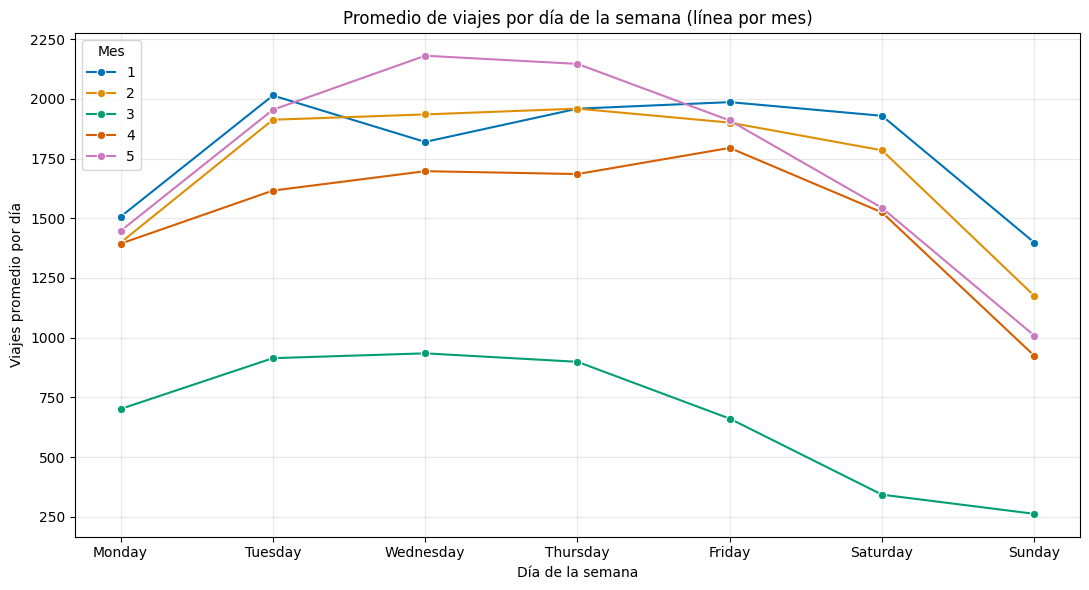

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Orden de días (en inglés si tus columnas están así)
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Asegurar tipo categórico ordenado para el eje X
promedio_semana = promedio_semana.copy()
promedio_semana['weekday'] = pd.Categorical(promedio_semana['weekday'], categories=dias_orden, ordered=True)

# (Opcional) limitar a los meses que quieras, ej. 1..5
promedio_semana = promedio_semana[promedio_semana['month'].isin([1,2,3,4,5])]

plt.figure(figsize=(11,6))
sns.lineplot(
    data=promedio_semana.sort_values(['month','weekday']),
    x='weekday', y='promedio_viajes',
    hue='month', marker='o', palette='colorblind'
)
plt.title('Promedio de viajes por día de la semana (línea por mes)')
plt.xlabel('Día de la semana')
plt.ylabel('Viajes promedio por día')
plt.xticks(rotation=0)
plt.legend(title='Mes', loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [73]:
# Filtrar meses de interés
df_ene_may = df_all[df_all['month'].isin([1,2,3,4,5])]
# Calcular viajes por día (unidad: fecha calendario)
viajes_por_dia = (
    df_ene_may.groupby(['month','date'])
    .size()
    .reset_index(name='count')
)
# Calcular promedio por mes
promedio_mes = (
    viajes_por_dia.groupby('month')['count']
    .mean()
    .reset_index(name='promedio_diario')
)
print(promedio_mes)

   month  promedio_diario
0      1      1813.322581
1      2      1723.428571
2      3       650.322581
3      4      1528.366667
4      5      1753.387097


#### **Conclusiones preliminares sobre la demanda**

1.	<u>Patrón semanal consistente</u>

La demanda presenta un comportamiento similar en todos los meses: aumenta progresivamente desde lunes, alcanza un pico entre martes y jueves, y disminuye hacia el fin de semana, con la menor demanda en domingo.

2.	<u>El mes no cambia el patrón semanal</u>

Aunque el nivel total de viajes puede variar entre meses, el patrón de lunes a domingo se mantiene estable. Es decir, el mes no altera la forma del comportamiento, solo la magnitud.

3.	<u>Importancia del día de la semana</u>

El día de la semana es un factor determinante en la variación de la demanda, mucho más relevante que el mes. Esto significa que el modelo de predicción debería tratar el día de la semana como variable clave.

4.	<u>Variaciones en la magnitud mensual</u>

Al comparar los promedios diarios, enero y mayo son los meses con mayor volumen de viajes, mientras que marzo muestra un nivel anómalo y mucho más bajo, lo que podría deberse a problemas en la base de datos o a un evento externo.

<br>




---------------------------------
---------------------------------

<br>

#### **¿La semana dentro del mes cambia el patrón semanal?**

Es esperable que no sea un factor relevante.

¿Afecta la semana dentro del mes a los días con mayor o menor demanda?

In [79]:
df_all.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,month,weekday,week_of_month,hour,date
0,B00254,2025-01-01 00:17:33,2025-01-01 00:41:16,161.0,265.0,NaN,B00254,1,Wednesday,1,0,2025-01-01
1,B00254,2025-01-01 00:22:04,2025-01-01 00:26:42,163.0,237.0,NaN,B00254,1,Wednesday,1,0,2025-01-01
2,B00254,2025-01-01 00:27:03,2025-01-01 00:31:42,237.0,141.0,NaN,B00254,1,Wednesday,1,0,2025-01-01
3,B01087,2025-01-01 00:42:15,2025-01-01 01:20:48,170.0,265.0,NaN,B01087,1,Wednesday,1,0,2025-01-01
4,B01087,2025-01-01 00:48:00,2025-01-01 01:25:45,142.0,265.0,NaN,B01087,1,Wednesday,1,0,2025-01-01


In [80]:
import calendar

cal = calendar.Calendar(firstweekday=0)  # 0 = Monday

def week_of_month(dt):
    month_weeks = cal.monthdayscalendar(dt.year, dt.month)  # lista de semanas, c/semana = [L..D] (0 si no hay día)
    for i, week in enumerate(month_weeks, start=1):
        if dt.day in week:
            return i

In [81]:
df_all["week_of_month"] = df_all["pickup_datetime"].apply(week_of_month)

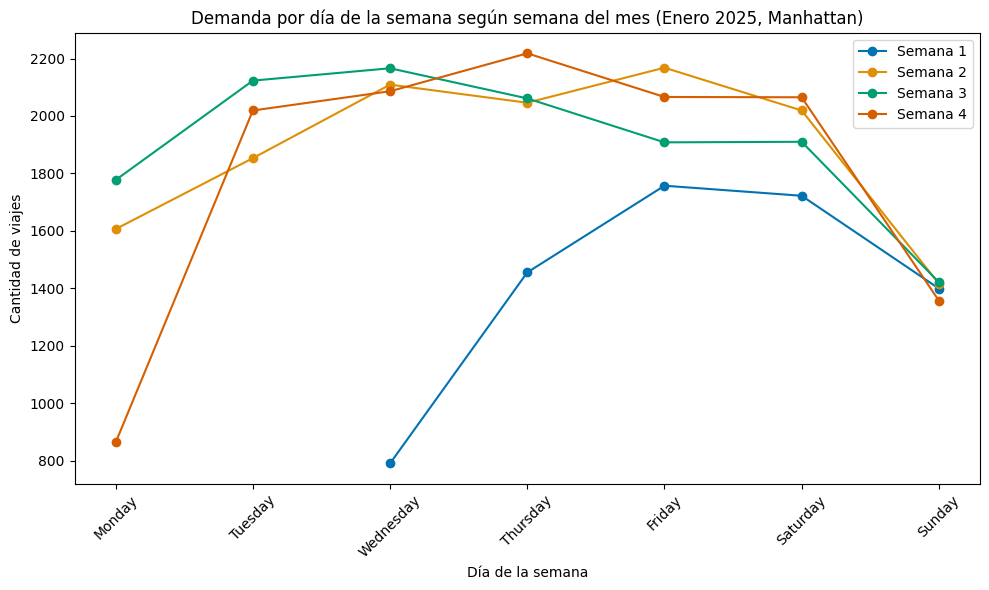

In [83]:
# Analizar si la semana dentro del mes afecta los días con mayor o menor demanda
mes_interes = 1
df_mes = df_all[df_all['month'] == mes_interes]
demanda_semana_dia = (
    df_mes.groupby(["week_of_month", "weekday"])
          .size()
          .reset_index(name="count")
)

# Ordenar los días de la semana
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Seleccionar solo semanas 1 a 4
semanas_validas = [1, 2, 3, 4]
colores = sns.color_palette("colorblind", n_colors=len(semanas_validas))

plt.figure(figsize=(10,6))
for i, semana in enumerate(semanas_validas):
    datos_semana = demanda_semana_dia[demanda_semana_dia['week_of_month'] == semana]
    datos_semana = datos_semana.set_index('weekday').reindex(dias_orden)
    plt.plot(dias_orden, datos_semana['count'], marker='o',
         label=f'Semana {semana}', color=colores[i])
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de viajes')
plt.title('Demanda por día de la semana según semana del mes (Enero 2025, Manhattan)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El miércoles de la semana 1 tiene una dda mucho menor ya que es el 1 de enero y es feriado en EEUU. El lunes de la semana 4 corresponde al lunes 20 de enero, el cual también es feriado en EEUU por el día de Martin Luther King Jr.

Sin considerar esos días podemos ver como el patrón semanal se sigue cumpliendo sin importar la semana dentro del mes.

Podemos verlo también para otro mes. Por ejemplo, abril que no tiene feriados.


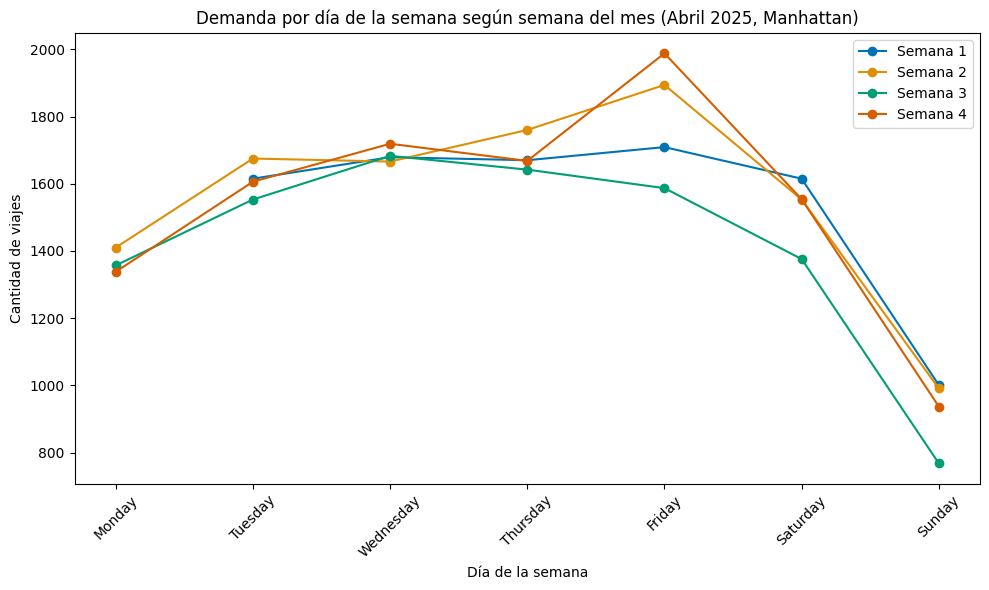

In [84]:
mes_interes = 4
df_mes = df_all[df_all['month'] == mes_interes]

# Agrupar por semana del mes y día de la semana
demanda_semana_dia = df_mes.groupby(['week_of_month', 'weekday']).size().reset_index(name='count')

# Ordenar los días de la semana
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Seleccionar solo semanas 1 a 4
semanas_validas = [1, 2, 3, 4]
colores = sns.color_palette("colorblind", n_colors=len(semanas_validas))

plt.figure(figsize=(10,6))
for i, semana in enumerate(semanas_validas):
    datos_semana = demanda_semana_dia[demanda_semana_dia['week_of_month'] == semana]
    datos_semana = datos_semana.set_index('weekday').reindex(dias_orden)
    plt.plot(dias_orden, datos_semana['count'], marker='o', label=f'Semana {semana}', color=colores[i])
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de viajes')
plt.title('Demanda por día de la semana según semana del mes (Abril 2025, Manhattan)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos ver como la semana no tiene practicamente ninguna influencia sobre el patrón semanal de demanda. La demanda para el viernes de la semana 3 no sube ya que es viernes santo.

Estabilidad entre semanas:
- La forma del patrón es casi igual en las 4 semanas
- La dda es predecible semana a semana

Variabilidad Moderada:
- Semana 4 llega a cerca de 2.000 el viernes, mientras que la 3 con apenas llega a 1.600
- El patrón se repite, pero hay diferencis de escala entre semanas
- Esto justifica usar distribuciones de probabilidad y no solo un promedio determinista por ejemplo

Patró laboral claro:
- De lunes a viernes la dda se mantiene alta
- Viernes tiende a ser el pico máximo
- Fines de semana caen fuertemente
- Mayor parte de los viajes tienen motivos laborales/diarios

----------------------------------------
Para los otros 3 meses del 2025:

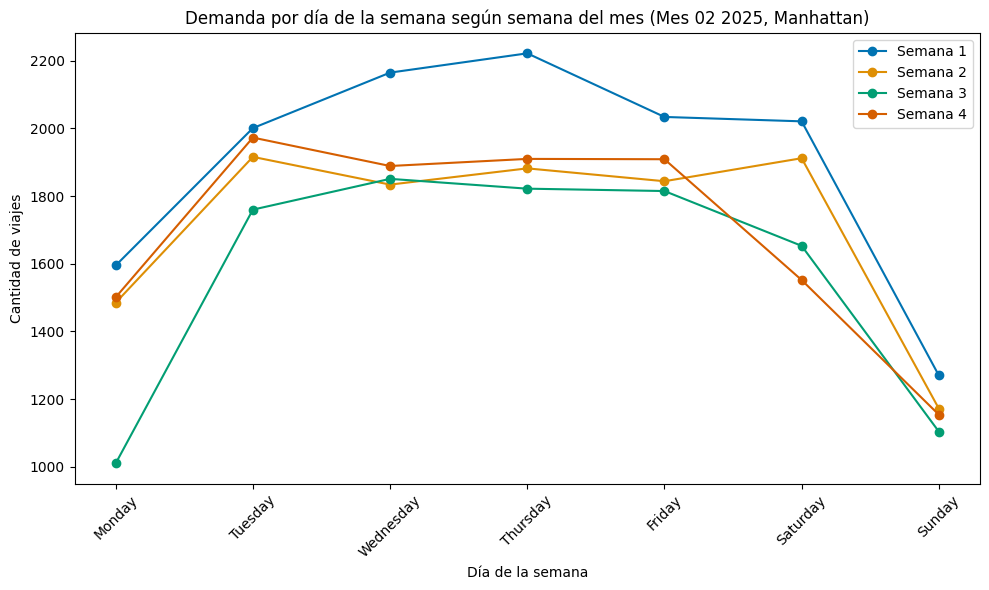

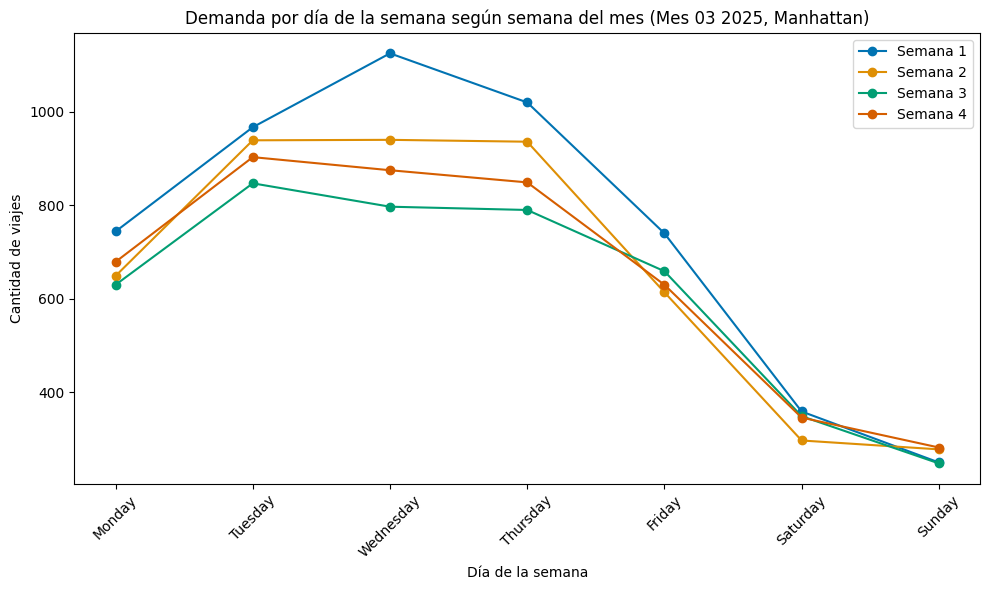

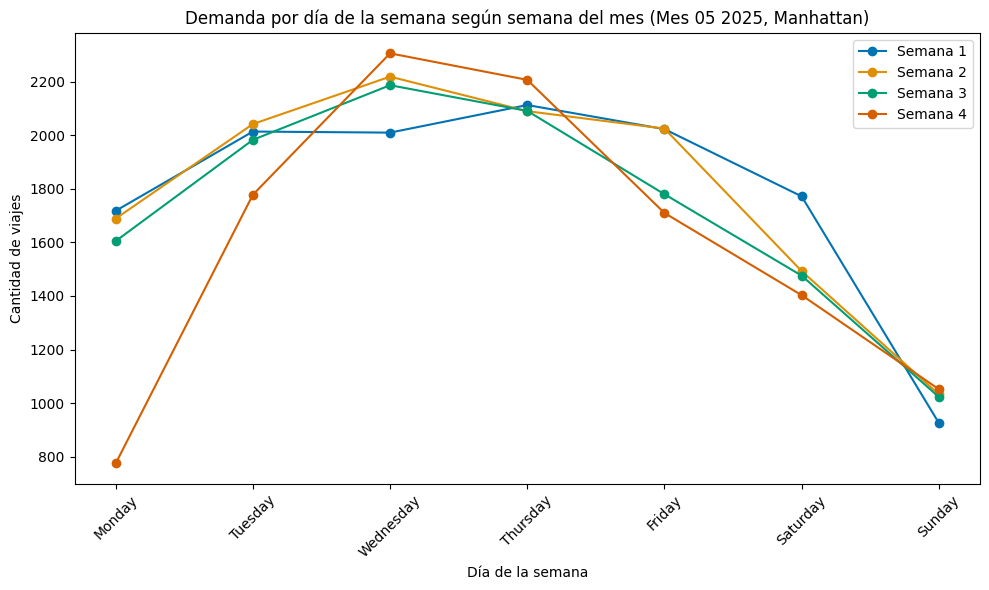

In [42]:
# Graficar demanda por día de la semana según semana del mes para los meses 2, 3 y 5

for mes_interes in [2, 3, 5]:
    df_mes = df_all[df_all['month'] == mes_interes]
    demanda_semana_dia = df_mes.groupby(['week_of_month', 'weekday']).size().reset_index(name='count')
    dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    semanas_validas = [1, 2, 3, 4]
    colores = sns.color_palette("colorblind", n_colors=len(semanas_validas))

    plt.figure(figsize=(10,6))
    for i, semana in enumerate(semanas_validas):
        datos_semana = demanda_semana_dia[demanda_semana_dia['week_of_month'] == semana]
        datos_semana = datos_semana.set_index('weekday').reindex(dias_orden)
        plt.plot(dias_orden, datos_semana['count'], marker='o', label=f'Semana {semana}', color=colores[i])
    plt.xlabel('Día de la semana')
    plt.ylabel('Cantidad de viajes')
    plt.title(f'Demanda por día de la semana según semana del mes (Mes {mes_interes:02d} 2025, Manhattan)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


-------------------------------------------------
-------------------------------------------------
<br><br>

#### **Dda según hora del día**
Esto logicamente debería afectar.

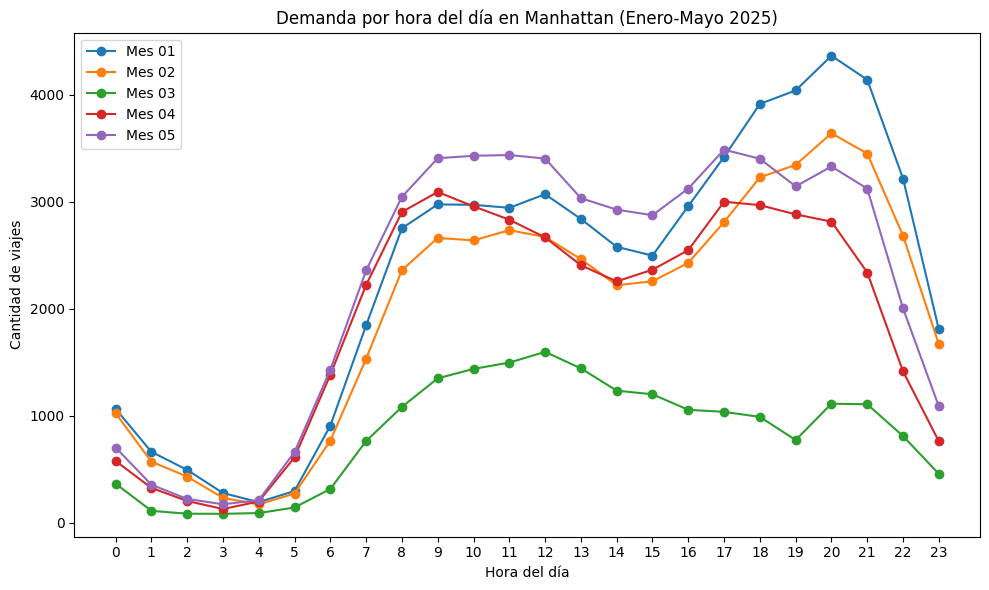

In [43]:

# Analizar variación de la demanda según la hora del día

# Agrupar por mes y hora
demanda_hora = df_all.groupby(['month', 'hour']).size().reset_index(name='count')

# Graficar
plt.figure(figsize=(10,6))
for mes in sorted(demanda_hora['month'].unique()):
    datos_mes = demanda_hora[demanda_hora['month'] == mes]
    plt.plot(datos_mes['hour'], datos_mes['count'], marker='o', label=f'Mes {mes:02d}')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de viajes')
plt.title('Demanda por hora del día en Manhattan (Enero-Mayo 2025)')
plt.legend()
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

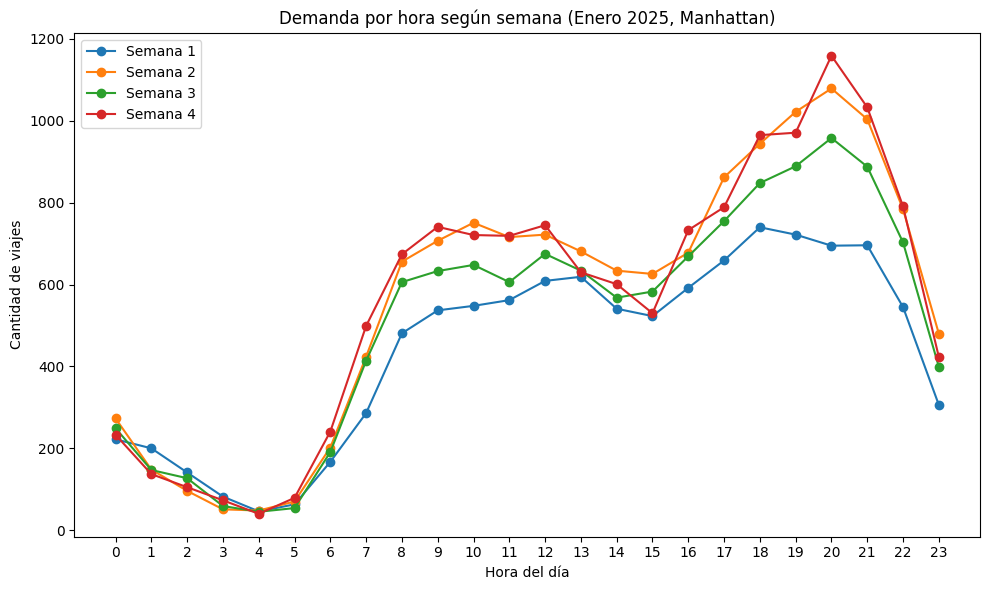

In [44]:
# Filtrar solo el mes 1 (enero)
df_mes1 = df_all[df_all['month'] == 1]

# Agrupar por semana del mes y hora
demanda_semana_hora = df_mes1.groupby(['week_of_month', 'hour']).size().reset_index(name='count')
demanda_semana_hora = demanda_semana_hora[demanda_semana_hora['week_of_month'].isin([1,2,3,4])]

# Graficar
plt.figure(figsize=(10,6))
for semana in sorted(demanda_semana_hora['week_of_month'].unique()):
    datos_semana = demanda_semana_hora[demanda_semana_hora['week_of_month'] == semana]
    plt.plot(datos_semana['hour'], datos_semana['count'], marker='o', label=f'Semana {semana}')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de viajes')
plt.title('Demanda por hora según semana (Enero 2025, Manhattan)')
plt.legend()
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()